In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/TR/input_final.txt",sep="\t")

X = df[["Tm1", "Tm2", "Tm3", "Tm4", "Baseline End", "Cq", "Cq Confidence", "Cq Mean", "Amp Score"]]
y = df["Result"]

# BE.9: 0
# Não BE.9: 1
# Inconclusivo: 2

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)


In [ ]:
df.value_counts("Result")


Result
1    175
0    150
2     58
dtype: int64

In [ ]:
# Balancear o dataset já que tem muito mais dado de conclusivo do que inconclusivo

from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
X_res, y_res = under_sampler.fit_resample(X_train, y_train)
X_res_test, y_res_test = under_sampler.fit_resample(X_test, y_test)

print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_train)}")

Training target statistics: Counter({0: 36, 1: 36, 2: 36})
Testing target statistics: Counter({1: 135, 0: 116, 2: 36})


In [ ]:
X_res = X_train
y_res = y_train
X_res_test = X_test
y_res_test = y_test

In [ ]:
print(type(X_res))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(n_jobs = -1)
# fit the model on the whole dataset
model.fit(X_res, y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
predito = model.predict(X_res_test)
print(len(predito))
print(len(y_res_test))


66
66


In [ ]:
print('Precision score %s' % precision_score(y_res_test, predito, average='micro'))
print('Recall score %s' % recall_score(y_res_test, predito, average='micro'))
print('F1-score score %s' % f1_score(y_res_test, predito, average='micro'))
print('Accuracy score %s' % accuracy_score(y_res_test, predito))

Precision score 0.9696969696969697
Recall score 0.9696969696969697
F1-score score 0.9696969696969697
Accuracy score 0.9696969696969697


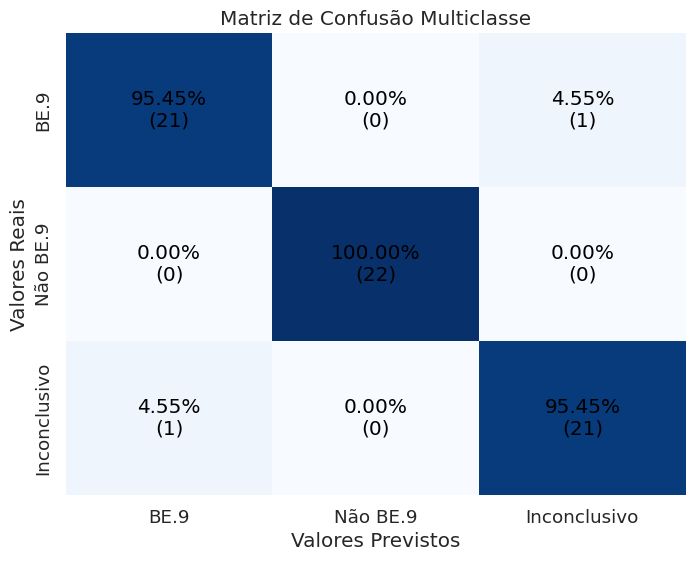

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


labels = ["BE.9", "Não BE.9", "Inconclusivo"]

conf_matrix = confusion_matrix(y_res_test, predito)
conf_matrix_percent = conf_matrix / np.sum(conf_matrix, axis=1, keepdims=True)

# Configuração do gráfico
class_names = labels
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=False, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names, cbar=False)
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix_percent[i, j]:.2%}\n({conf_matrix[i, j]})", ha="center", va="center", color="black")

plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão Multiclasse')
plt.show()

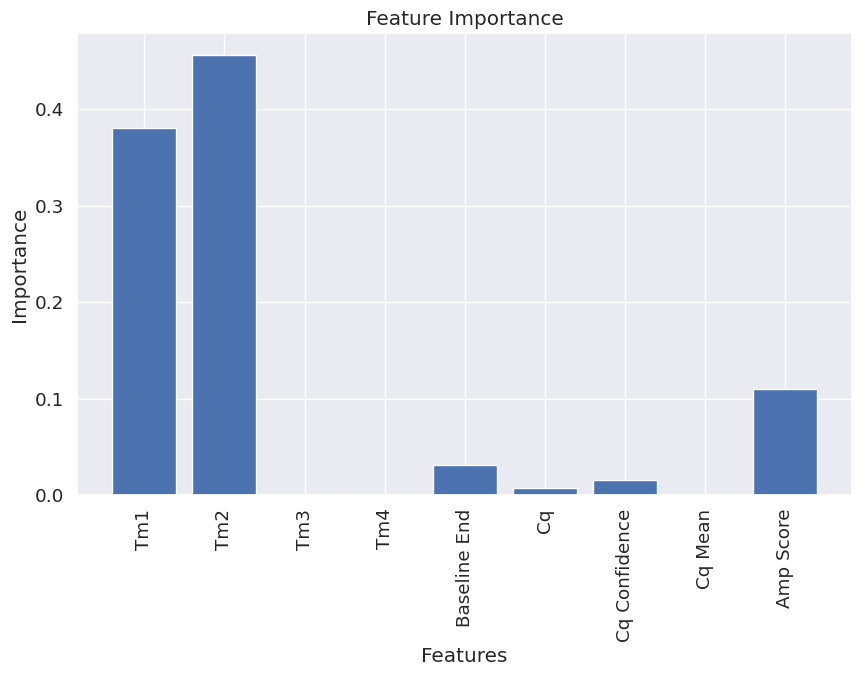

In [ ]:
# Obtenha a importância das features
importances = model.feature_importances_

# Crie um gráfico de barras para visualizar as importâncias das features
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances)
plt.xticks(range(len(importances)), X_train.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [ ]:
import joblib

# Supondo que você tem um modelo chamado 'model'
joblib.dump(model, '/content/drive/MyDrive/Machine Learning/TR/modelo_sybr.joblib')


['/content/drive/MyDrive/Machine Learning/TR/modelo_sybr.joblib']

In [ ]:
model.save_model("/content/drive/MyDrive/Machine Learning/TR/model.json")